# Notebook 1: Experiment Management

Source: https://github.com/allegroai/clearml/blob/master/docs/tutorials/Getting_Started_1_Experiment_Management.ipynb

## Setup

In [2]:
# %pip install --upgrade xgboost clearml

In [8]:
import clearml

In [9]:
%env CLEARML_WEB_HOST=http://localhost:8080
%env CLEARML_API_HOST=http://localhost:8008
%env CLEARML_FILES_HOST=http://localhost:8081
# Getting started NB
%env CLEARML_API_ACCESS_KEY=0JA742Y6QXZTPQPVSV37
%env CLEARML_API_SECRET_KEY=F4cxUA5b755I1SiMDAYLaCAWfRZlY2jVLIfC39cJKMk8jVw8ek

env: CLEARML_WEB_HOST=http://localhost:8080
env: CLEARML_API_HOST=http://localhost:8008
env: CLEARML_FILES_HOST=http://localhost:8081
env: CLEARML_API_ACCESS_KEY=0JA742Y6QXZTPQPVSV37
env: CLEARML_API_SECRET_KEY=F4cxUA5b755I1SiMDAYLaCAWfRZlY2jVLIfC39cJKMk8jVw8ek


## Example: XGBoost

⚠️ NOTE: `output_uri` in `Task.init` is an important parameter.

By default it is set to `False`, meaning any registered models will **NOT** be uploaded to **ClearML**, but their info will be registered. Set this to `True` to automatically upload all model files.

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from clearml import Task
import xgboost as xgb
import numpy as np


# Always initialize ClearML before anything else. Automatic hooks will track as
# much as possible for you!
task = Task.init(
    project_name="Getting Started",
    task_name="XGBoost Training",
    output_uri=True  # IMPORTANT: setting this to True will upload the model
    # If not set the local path of the model will be saved instead!
)

# Training data
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=100
)

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Setting the parameters
params = {
    'max_depth': 2,
    'eta': 1,
    'objective': 'reg:squarederror',
    'nthread': 4,
    'eval_metric': 'rmse',
}
# Make sure ClearML knows these parameters are our hyperparameters!
task.connect(params)

# Train the model
bst = xgb.train(
    params,
    dtrain,
    num_boost_round=100,
    evals=[(dtrain, "train"), (dtest, "test")],
    verbose_eval=0,
)

# Save the model, saving the model will automatically also register it to 
# ClearML thanks to the automagic hooks
bst.save_model("best_model")

ClearML Task: created new task id=fe6b0ccee01c41948050b89af3eb3db3
ClearML results page: http://localhost:8080/projects/8e249ce33960416bbbf44ac5ea9483c3/experiments/fe6b0ccee01c41948050b89af3eb3db3/output/log
2023-04-26 01:22:59,227 - clearml.storage - INFO - Starting upload: C:\Users\Admin\AppData\Local\Temp\.clearml.upload_model_sodzivil.tmp => http://localhost:8081/Getting Started/XGBoost Training.fe6b0ccee01c41948050b89af3eb3db3/models/best_model


2023-04-26 01:22:59,345 - clearml.Task - INFO - Storing jupyter notebook directly as code
2023-04-26 01:22:59,430 - clearml.Task - INFO - Completed model upload to http://localhost:8081/Getting%20Started/XGBoost%20Training.fe6b0ccee01c41948050b89af3eb3db3/models/best_model


In [11]:

# When a python script ends, the ClearML task is closed automatically. But in
# a notebook (that never ends), we need to manually close the task.
task.close()

## Example: Pytorch + Tensorboard + Matplotlib

In [12]:
import torch
import torch.nn as nn
import torch.optim as optim
from clearml import Task
from torch.utils.data import DataLoader
from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor
from torch.utils.tensorboard import SummaryWriter


# Always initialize ClearML before anything else. Automatic hooks will track as
# much as possible for you (such as in this case TensorBoard logs)!
task = Task.init(project_name="Getting Started", task_name="TB Logging")

# Set up TensorBoard logging
writer = SummaryWriter()

# Load MNIST dataset
train_data = MNIST('data', train=True, download=True, transform=ToTensor())
train_loader = DataLoader(train_data, batch_size=64, shuffle=True)

# Define model
model = nn.Sequential(
    nn.Linear(784, 128),
    nn.ReLU(),
    nn.Linear(128, 10)
)

# Define loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Train the model
for epoch in range(10):
    for i, (inputs, labels) in enumerate(train_loader):
        # Flatten input images
        inputs = inputs.view(-1, 784)
        
        # Zero the gradients
        optimizer.zero_grad()
        
        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        
        # Backward pass and update parameters
        loss.backward()
        optimizer.step()
        
        # Log loss to TensorBoard
        # ClearML will detect this and also log the scalar to the ClearML
        # experiment manager. So you don't even have to change your existing code!
        writer.add_scalar('Training loss', loss.item(), epoch * len(train_loader) + i)
        
    print(f'Epoch {epoch + 1} complete')
    
# Close TensorBoard writer
writer.close()

ClearML Task: created new task id=a1bfb09391194db287e955482ef3a5e9
ClearML results page: http://localhost:8080/projects/8e249ce33960416bbbf44ac5ea9483c3/experiments/a1bfb09391194db287e955482ef3a5e9/output/log


  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting data\MNIST\raw\train-images-idx3-ubyte.gz to data\MNIST\raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting data\MNIST\raw\train-labels-idx1-ubyte.gz to data\MNIST\raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting data\MNIST\raw\t10k-images-idx3-ubyte.gz to data\MNIST\raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting data\MNIST\raw\t10k-labels-idx1-ubyte.gz to data\MNIST\raw

Epoch 1 complete
Epoch 2 complete
Epoch 3 complete
Epoch 4 complete
Epoch 5 complete
Epoch 6 complete
Epoch 7 complete
Epoch 8 complete
Epoch 9 complete
Epoch 10 complete


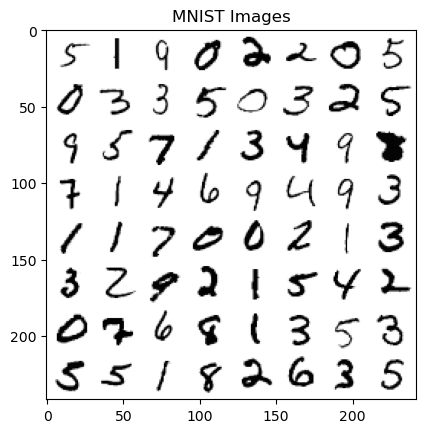

In [13]:
import matplotlib.pyplot as plt
import torchvision

# Helper function to show an image
def matplotlib_imshow(img):
    img = img.mean(dim=0)
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.title("MNIST Images")
    plt.imshow(npimg, cmap="Greys")

# get some random training images
dataiter = iter(train_loader)
images, labels = next(dataiter)

# create grid of images
img_grid = torchvision.utils.make_grid(images)

# show images
matplotlib_imshow(img_grid)

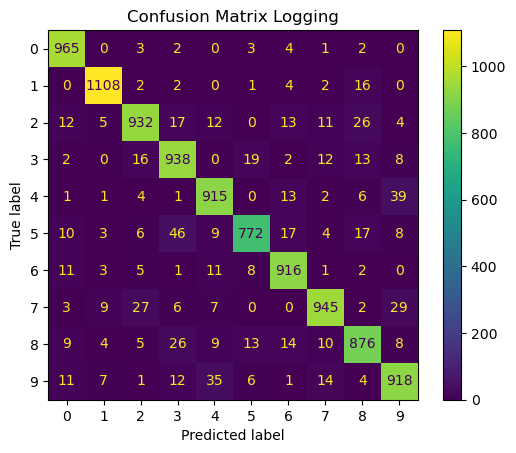

In [14]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


# Load MNIST test dataset
test_data = MNIST('data', train=False, download=True, transform=ToTensor())
test_loader = DataLoader(test_data, batch_size=64, shuffle=False)

# Test the model and compute confusion matrix
y_true = []
y_pred = []
model.eval()
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs = inputs.view(-1, 784)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        y_true.extend(labels.numpy())
        y_pred.extend(predicted.numpy())
cm = confusion_matrix(y_true, y_pred)

# Display confusion matrix
plt.title("Confusion Matrix Logging")
ConfusionMatrixDisplay(cm).plot(ax=plt.gca())

In [15]:

# When a python script ends, the ClearML task is closed automatically. But in
# a notebook (that never ends), we need to manually close the task.
task.close()

## Example: Sklearn

ClearML Task: created new task id=8aca0116fb434166a32ff01f7fe2f074
ClearML results page: http://localhost:8080/projects/8e249ce33960416bbbf44ac5ea9483c3/experiments/8aca0116fb434166a32ff01f7fe2f074/output/log


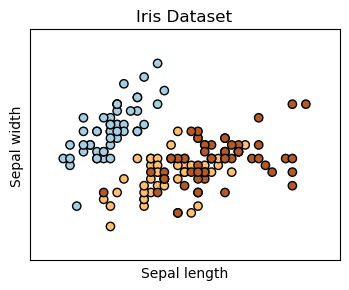

In [16]:
import joblib

from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

from clearml import Task


# Connecting ClearML with the current process,
# from here on everything is logged automatically
task = Task.init(
    project_name="Getting Started",
    task_name="Scikit-Learn",
    output_uri=True
)

iris = datasets.load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = \
  train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(solver='liblinear', multi_class='auto')
model.fit(X_train, y_train)

# Using joblib to save the model will automatically register it to ClearML, too!
joblib.dump(model, 'model.pkl', compress=True)

loaded_model = joblib.load('model.pkl')
result = loaded_model.score(X_test, y_test)
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
plt.figure(1, figsize=(4, 3))

plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
plt.title("Iris Dataset")
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

# Plt.show() will trigger ClearML to log the resulting plot automatically
plt.show()

# Always close the task when in a notebook! If using a python file, the task is
# closed automatically when the script ends.
task.close()